## 1次元の線形最小二乗法
次の4点のデータを$y = a_1+a_2 x+a_3 x^2$で近似せよ(2006年度期末試験)．

X:=[0,1,2,3];  
Y:=[1,3,4,10];

coefficients:  [ 1.  -0.2  1.3]


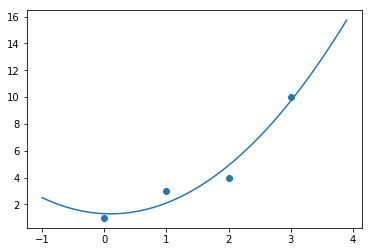

In [1]:
# 7.7.1
import numpy as np
import matplotlib.pyplot as plt


def main():
    X = np.array([0, 1, 2, 3])
    Y = np.array([1, 3, 4, 10])

    plt.scatter(X, Y)

    x = np.arange(-1, 4, 0.1)

    # 次数dをあげると過学習
    d = 2
    coefficients = np.polyfit(X, Y, d)  # 係数(重み)
    # scipyもある
    print('coefficients: ', coefficients)

    approximation_func1 = np.poly1d(coefficients)
    plt.plot(x, approximation_func1(x), label='d=1')
    plt.show()


if __name__ == "__main__":
    main()


## 2次元の最小二乗フィット

以下のデータを
$$
f(x, y) = a_1+a_2 x+a_3 y+a_4 xy
$$
で近似せよ

|x|y|z|
|-|-|-|
|-1|-1|2.00000|
|-1|0|0.50000|
|-1|1|-1.00000|
| 0|-1| 0.50000|
| 0| 0| 1.00000|
| 0| 1| 1.50000|
| 1|-1|-1.00000|
| 1| 0| 1.50000|
| 1| 1| 4.00000|

DATA.shape:  (9, 3)
param:
 [ 1.   0.5  0.5  2. ]
cov:
 [[  2.73910033e-34   3.40131506e-43  -3.40131475e-43   1.02039443e-42]
 [  3.40131506e-43   4.10865055e-34  -1.86223210e-50   1.39667408e-50]
 [ -3.40131475e-43  -1.86223210e-50   4.10865055e-34  -2.78196922e-68]
 [  1.02039443e-42   1.39667408e-50  -2.78196922e-68   6.16297582e-34]]


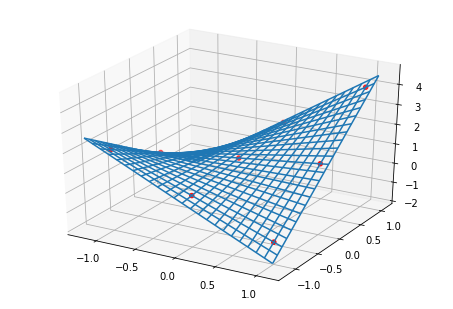

In [2]:
# 7.7.2
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D



def fitting_func(data, a1, a2, a3, a4):
    # print('data.shape :', data.shape)
    z = a1 + a2*data[:, 0] + a3*data[:, 1] + a4*data[:, 0]*data[:, 1]
    return z


def main():
    X = np.array([-1, -1, -1, 0, 0, 0, 1, 1, 1])
    Y = np.array([-1, 0, 1, -1, 0, 1, -1, 0, 1])
    Z = np.array([2.0, 0.5, -1.0, 0.5, 1.0, 1.5, -1.0, 1.5, 4.0])
    DATA = np.vstack((X, Y, Z))
    DATA = DATA.T
    print('DATA.shape: ', DATA.shape)

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter3D(X, Y, Z, c='r')

    param, cov = curve_fit(fitting_func, DATA[:,:2], DATA[:, 2])
    print('param:\n', param)
    print('cov:\n', cov)

    x = np.arange(-1.2, 1.2, 0.1)
    y = np.arange(-1.2, 1.2, 0.1)
    xm, ym = np.meshgrid(x, y)  # 2次元メッシュを作成

    #data = np.vstack((xm, ym))
    #data = data.T

    fit_z = param[0] + param[1]*xm + param[2]*ym + param[3]*xm*ym
    # meshgridを通して関数に(x,yを)渡す必要があるが
    # vstackでまとめた形式ではうまくいかない
    # 仕方ないので(x,y)をvstackでまとめず，関数を再び書く
    ax.plot_wireframe(xm, ym, fit_z)

    plt.show()

if __name__ == '__main__':
    main()
